### Erforderliche Pakete importieren

In [1]:
# NLTK-related imports
# Dekommentieren Sie alle Zeile mit 'download', wenn diese Ressourcen noch nicht downgeloadet haben
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import GermanStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
# Andere Imports
import string
import re
# Dekommentieren Sie die folgende Zeile, wenn Sie den HanoverTagger und WordCloud noch nicht installiert haben
!pip install HanTa 
!pip install wordcloud
from HanTa import HanoverTagger as ht # Dokumentation: https://pypi.org/project/HanTa/
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 2.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Tokenisierung mit split() und re.split()

In [3]:
greeting = "Wie geht's dir? Mir geht's super. Ich habe €1,000 gewonnen!"

greeting_tokens_erster_versuch = greeting.split(' ')
" | ".join(greeting_tokens_erster_versuch)

"Wie | geht's | dir? | Mir | geht's | super. | Ich | habe | €1,000 | gewonnen!"

In [4]:
# import re # schon gemacht
# \W bedeutet 'alle Zeichenketten, die kein Zeichen sind'
greeting_tokens_zweiter_versuch = re.split('\W', greeting)
" | ".join(greeting_tokens_zweiter_versuch)

'Wie | geht | s | dir |  | Mir | geht | s | super |  | Ich | habe |  | 1 | 000 | gewonnen | '

### Tokenisierung mit NLTK.

Optionale Hausaufgaben: Hier ist eine interessante Beschreibung der Probleme der Tokenisierung, die Sie vielleicht gerne lesen möchten: https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html

In [5]:
nltk.download('punkt')

greeting_tokens = nltk.word_tokenize(greeting, language='german')
" | ".join(greeting_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"Wie | geht | 's | dir | ? | Mir | geht | 's | super | . | Ich | habe | €1,000 | gewonnen | !"

In [6]:
spring = "I love spring. Every day the weather gets warmer, " \
        "and the birds compete to see who can sing the loudest. " \
        "I am never unhappy, when I'm in the nature on a spring day."

spring_tokens = nltk.word_tokenize(spring, language='english')
" | ".join(spring_tokens)

"I | love | spring | . | Every | day | the | weather | gets | warmer | , | and | the | birds | compete | to | see | who | can | sing | the | loudest | . | I | am | never | unhappy | , | when | I | 'm | in | the | nature | on | a | spring | day | ."

### Satz Tokenisierung

In [7]:
biographie = "Julia Gillard ist eine australische Politikerin und Australiens einzige weibliche " \
             "Premierministerin, von 2010 bis 2013 im Dienst. Sie wuchs in Adelaide auf und besuchte " \
             "die University of Melbourne, die sie mit einem Bachelor of Laws abschloss. Während " \
             "dieser Zeit war sie Präsidentin der Australian Union of Students. Gillard arbeitete " \
             "zunächst als Partnerin bei der Anwaltskanzlei Slater and Gordon und spezialisierte " \
             "sich auf Arbeitsrecht. Später trat sie der Labor Party bei und wurde deren Vorsitzende."

biographie_sents = nltk.sent_tokenize(biographie, language='german')

for sent in biographie_sents:
    print(sent, '\n')

Julia Gillard ist eine australische Politikerin und Australiens einzige weibliche Premierministerin, von 2010 bis 2013 im Dienst. 

Sie wuchs in Adelaide auf und besuchte die University of Melbourne, die sie mit einem Bachelor of Laws abschloss. 

Während dieser Zeit war sie Präsidentin der Australian Union of Students. 

Gillard arbeitete zunächst als Partnerin bei der Anwaltskanzlei Slater and Gordon und spezialisierte sich auf Arbeitsrecht. 

Später trat sie der Labor Party bei und wurde deren Vorsitzende. 



### Part-of-Speech Tagging

In [8]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [9]:
nltk.help.upenn_tagset(tagpattern='VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [10]:
nltk.help.upenn_tagset(tagpattern='VB*')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
 

In [11]:
" | ".join(spring_tokens)

"I | love | spring | . | Every | day | the | weather | gets | warmer | , | and | the | birds | compete | to | see | who | can | sing | the | loudest | . | I | am | never | unhappy | , | when | I | 'm | in | the | nature | on | a | spring | day | ."

In [12]:
nltk.download('averaged_perceptron_tagger')
spring_tokens_and_tags = nltk.pos_tag(spring_tokens)
spring_tokens_and_tags[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('love', 'VBP'),
 ('spring', 'NN'),
 ('.', '.'),
 ('Every', 'DT'),
 ('day', 'NN'),
 ('the', 'DT'),
 ('weather', 'NN'),
 ('gets', 'VBZ'),
 ('warmer', 'JJR')]

In [13]:
# POS Tagging mit Sätze
spring_sents = nltk.sent_tokenize(spring)
spring_tokens_and_tags_per_sent = [nltk.word_tokenize(sent) for sent in spring_sents]
nltk.pos_tag_sents(spring_tokens_and_tags_per_sent)

[[('I', 'PRP'), ('love', 'VBP'), ('spring', 'NN'), ('.', '.')],
 [('Every', 'DT'),
  ('day', 'NN'),
  ('the', 'DT'),
  ('weather', 'NN'),
  ('gets', 'VBZ'),
  ('warmer', 'JJR'),
  (',', ','),
  ('and', 'CC'),
  ('the', 'DT'),
  ('birds', 'NNS'),
  ('compete', 'VBP'),
  ('to', 'TO'),
  ('see', 'VB'),
  ('who', 'WP'),
  ('can', 'MD'),
  ('sing', 'VB'),
  ('the', 'DT'),
  ('loudest', 'JJS'),
  ('.', '.')],
 [('I', 'PRP'),
  ('am', 'VBP'),
  ('never', 'RB'),
  ('unhappy', 'JJ'),
  (',', ','),
  ('when', 'WRB'),
  ('I', 'PRP'),
  ("'m", 'VBP'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('nature', 'NN'),
  ('on', 'IN'),
  ('a', 'DT'),
  ('spring', 'NN'),
  ('day', 'NN'),
  ('.', '.')]]

In [14]:
nltk.download('universal_tagset')
# POS Tagging mit einem anderen Tag Schema, zB das Universal Tagset
spring_tokens_and_tags_universal = nltk.pos_tag(spring_tokens, tagset='universal')
spring_tokens_and_tags_universal[:10]

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('I', 'PRON'),
 ('love', 'VERB'),
 ('spring', 'NOUN'),
 ('.', '.'),
 ('Every', 'DET'),
 ('day', 'NOUN'),
 ('the', 'DET'),
 ('weather', 'NOUN'),
 ('gets', 'VERB'),
 ('warmer', 'ADJ')]

In [15]:
# POS Tagging auf Deutsch
fruehling = "Ich liebe den Frühling. Jeden Tag wird das Wetter wärmer, " \
            "und die Vögel wetteifern darum, wer am lautesten singen kann. " \
            "Ich bin nie unglücklich, wenn ich an einem Frühlingstag in der Natur bin."
fruehling_tokens = nltk.word_tokenize(fruehling, language='german')
" | ".join(fruehling_tokens)

'Ich | liebe | den | Frühling | . | Jeden | Tag | wird | das | Wetter | wärmer | , | und | die | Vögel | wetteifern | darum | , | wer | am | lautesten | singen | kann | . | Ich | bin | nie | unglücklich | , | wenn | ich | an | einem | Frühlingstag | in | der | Natur | bin | .'

In [16]:
# nltk pos_tagging für Deutsch produziert nur Unsinn
fruehling_tokens_und_tags = nltk.pos_tag(fruehling_tokens)
fruehling_tokens_und_tags

[('Ich', 'NNP'),
 ('liebe', 'VBZ'),
 ('den', 'JJ'),
 ('Frühling', 'NNP'),
 ('.', '.'),
 ('Jeden', 'NNP'),
 ('Tag', 'NNP'),
 ('wird', 'NN'),
 ('das', 'NNS'),
 ('Wetter', 'NNP'),
 ('wärmer', 'NN'),
 (',', ','),
 ('und', 'JJ'),
 ('die', 'NN'),
 ('Vögel', 'NNP'),
 ('wetteifern', 'JJ'),
 ('darum', 'NN'),
 (',', ','),
 ('wer', 'JJR'),
 ('am', 'VBP'),
 ('lautesten', 'JJ'),
 ('singen', 'NN'),
 ('kann', 'NN'),
 ('.', '.'),
 ('Ich', 'NNP'),
 ('bin', 'VBD'),
 ('nie', 'JJ'),
 ('unglücklich', 'JJ'),
 (',', ','),
 ('wenn', 'WP'),
 ('ich', 'VBP'),
 ('an', 'DT'),
 ('einem', 'NN'),
 ('Frühlingstag', 'NNP'),
 ('in', 'IN'),
 ('der', 'NN'),
 ('Natur', 'NNP'),
 ('bin', 'NN'),
 ('.', '.')]

In [17]:
tagger = ht.HanoverTagger('morphmodel_ger.pgz')
# Dieses Modell wurde vortrainiert mit dem TIGER corpus deutschem Zeitungstext
# https://www.ims.uni-stuttgart.de/forschung/ressourcen/korpora/tiger/
# Tagset: https://www.linguistik.hu-berlin.de/de/institut/professuren/korpuslinguistik/mitarbeiter-innen/hagen/STTS_Tagset_Tiger

In [18]:
fruehling_analysed = [tagger.analyze(token) for token in fruehling_tokens]
fruehling_analysed

[('ich', 'PPER'),
 ('Liebe', 'NN'),
 ('den', 'ART'),
 ('Frühling', 'NN'),
 ('--', '$.'),
 ('jeden', 'PIAT'),
 ('Tag', 'NN'),
 ('werden', 'VAFIN'),
 ('das', 'ART'),
 ('Wetter', 'NN'),
 ('warm', 'ADJD'),
 ('--', '$,'),
 ('und', 'KON'),
 ('die', 'ART'),
 ('Vogel', 'NN'),
 ('wetteifern', 'VVINF'),
 ('darum', 'PROAV'),
 ('--', '$,'),
 ('wer', 'PWS'),
 ('am', 'APPRART'),
 ('laut', 'ADJA'),
 ('singen', 'VVINF'),
 ('können', 'VMFIN'),
 ('--', '$.'),
 ('ich', 'PPER'),
 ('sein', 'VAFIN'),
 ('nie', 'ADV'),
 ('unglücklich', 'ADJD'),
 ('--', '$,'),
 ('wenn', 'KOUS'),
 ('ich', 'PPER'),
 ('an', 'APPR'),
 ('einem', 'ART'),
 ('Frühlingstag', 'NN'),
 ('in', 'APPR'),
 ('der', 'ART'),
 ('Natur', 'NN'),
 ('sein', 'VAFIN'),
 ('--', '$.')]

### Stemming (Englisch)

In [19]:
# Erinnerung: Wir haben zuvor einen Text 'spring' tokenisiert
" | ".join(spring_tokens)

"I | love | spring | . | Every | day | the | weather | gets | warmer | , | and | the | birds | compete | to | see | who | can | sing | the | loudest | . | I | am | never | unhappy | , | when | I | 'm | in | the | nature | on | a | spring | day | ."

In [20]:
porter = PorterStemmer() 
snowball = SnowballStemmer(language="english")

spring_stems_porter = [porter.stem(token) for token in spring_tokens]
spring_stems_snowball = [snowball.stem(token) for token in spring_tokens]

print(f"Porter stems:\n{' | '.join(spring_stems_porter)}\n")
print(f"Snowball stems:\n{' | '.join(spring_stems_snowball)}\n")

Porter stems:
i | love | spring | . | everi | day | the | weather | get | warmer | , | and | the | bird | compet | to | see | who | can | sing | the | loudest | . | i | am | never | unhappi | , | when | i | 'm | in | the | natur | on | a | spring | day | .

Snowball stems:
i | love | spring | . | everi | day | the | weather | get | warmer | , | and | the | bird | compet | to | see | who | can | sing | the | loudest | . | i | am | never | unhappi | , | when | i | 'm | in | the | natur | on | a | spring | day | .



In [21]:
similar_tokens = ["birds", "bird", "gardens", "garden", "loudest", "louder", "loud"]
print(f"Porter stems:\n{' | '.join([porter.stem(token) for token in similar_tokens])}")
print(f"Snowball stems:\n{' | '.join([snowball.stem(token) for token in similar_tokens])}")

Porter stems:
bird | bird | garden | garden | loudest | louder | loud
Snowball stems:
bird | bird | garden | garden | loudest | louder | loud


In [22]:
lancaster = LancasterStemmer()
spring_stems_lancaster = [lancaster.stem(token) for token in spring_tokens]

print(f"Lancaster stems:\n{' | '.join(spring_stems_lancaster)}\n")

Lancaster stems:
i | lov | spring | . | every | day | the | weath | get | warm | , | and | the | bird | compet | to | see | who | can | sing | the | loudest | . | i | am | nev | unhappy | , | when | i | 'm | in | the | nat | on | a | spring | day | .



In [23]:
print(f"Lancaster stems:\n{' | '.join([lancaster.stem(token) for token in similar_tokens])}")

Lancaster stems:
bird | bird | gard | gard | loudest | loud | loud


In [24]:
# Ein häufiges Problem: over-stemming
similar_tokens = ["university", "universe", "dressing", "dresses"]
print(f"Porter stems:\n{' | '.join([porter.stem(token) for token in similar_tokens])}")
print(f"Snowball stems:\n{' | '.join([snowball.stem(token) for token in similar_tokens])}")
print(f"Lancaster stems:\n{' | '.join([lancaster.stem(token) for token in similar_tokens])}")

Porter stems:
univers | univers | dress | dress
Snowball stems:
univers | univers | dress | dress
Lancaster stems:
univers | univers | dress | dress


### Stemming (Deutsch)

In [25]:
# Erinnerung: Wir haben zuvor einen Text 'frühling' tokenisiert
" | ".join(fruehling_tokens)

'Ich | liebe | den | Frühling | . | Jeden | Tag | wird | das | Wetter | wärmer | , | und | die | Vögel | wetteifern | darum | , | wer | am | lautesten | singen | kann | . | Ich | bin | nie | unglücklich | , | wenn | ich | an | einem | Frühlingstag | in | der | Natur | bin | .'

In [26]:
snowball_german = SnowballStemmer(language='german')

# Alternative:
# from nltk.stem.snowball import GermanStemmer
# german_stemmer = GermanStemmer()

fruehling_stems = [snowball_german.stem(token) for token in fruehling_tokens]
" | ".join(fruehling_stems)

'ich | lieb | den | fruhling | . | jed | tag | wird | das | wett | warm | , | und | die | vogel | wetteif | darum | , | wer | am | laut | sing | kann | . | ich | bin | nie | ungluck | , | wenn | ich | an | ein | fruhlingstag | in | der | natur | bin | .'

### Lemmatisierung (Englisch)

In [27]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()
spring_lemmas = [wordnet_lemmatizer.lemmatize(t) for t in spring_tokens]
" | ".join(spring_lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


"I | love | spring | . | Every | day | the | weather | get | warmer | , | and | the | bird | compete | to | see | who | can | sing | the | loudest | . | I | am | never | unhappy | , | when | I | 'm | in | the | nature | on | a | spring | day | ."

In [28]:
spring_tokens_and_tags[:5]

[('I', 'PRP'), ('love', 'VBP'), ('spring', 'NN'), ('.', '.'), ('Every', 'DT')]

In [29]:
# Reminder: you can view NLTK tags and their information via nltk.help.upenn_tagset(tagpattern=None)
def upenn_to_wordnet_pos(tag: str):

    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [30]:
spring_tokens_and_wordnet_tags = []
for tok, pos in spring_tokens_and_tags:
    new_pos = upenn_to_wordnet_pos(pos)
    spring_tokens_and_wordnet_tags.append((tok, new_pos))
    
spring_lemmas_improved = [wordnet_lemmatizer.lemmatize(word=token, pos=pos) for token, pos in spring_tokens_and_wordnet_tags]
" | ".join(spring_lemmas_improved)

"I | love | spring | . | Every | day | the | weather | get | warm | , | and | the | bird | compete | to | see | who | can | sing | the | loud | . | I | be | never | unhappy | , | when | I | 'm | in | the | nature | on | a | spring | day | ."

### Stemming versus Lemmatisation for unknown words

In [ ]:
novel_words = ['twerking', 'twerks', 'twerked', 'vaping', 'vapes', 'vape']
print(" | ".join([snowball.stem(t) for t in novel_words]))
print(" | ".join([wordnet_lemmatizer.lemmatize(t) for t in novel_words]))

twerk | twerk | twerk | vape | vape | vape
twerking | twerks | twerked | vaping | vapes | vape


### Lemmatisierung (Deutsch)

In [31]:
tagger = ht.HanoverTagger('morphmodel_ger.pgz')
# Dieses Modell wurde vortrainiert mit dem TIGER corpus deutschem Zeitungstext
# https://www.ims.uni-stuttgart.de/forschung/ressourcen/korpora/tiger/

In [32]:
fruehling_analysed = [tagger.analyze(token) for token in fruehling_tokens]
fruehling_analysed

[('ich', 'PPER'),
 ('Liebe', 'NN'),
 ('den', 'ART'),
 ('Frühling', 'NN'),
 ('--', '$.'),
 ('jeden', 'PIAT'),
 ('Tag', 'NN'),
 ('werden', 'VAFIN'),
 ('das', 'ART'),
 ('Wetter', 'NN'),
 ('warm', 'ADJD'),
 ('--', '$,'),
 ('und', 'KON'),
 ('die', 'ART'),
 ('Vogel', 'NN'),
 ('wetteifern', 'VVINF'),
 ('darum', 'PROAV'),
 ('--', '$,'),
 ('wer', 'PWS'),
 ('am', 'APPRART'),
 ('laut', 'ADJA'),
 ('singen', 'VVINF'),
 ('können', 'VMFIN'),
 ('--', '$.'),
 ('ich', 'PPER'),
 ('sein', 'VAFIN'),
 ('nie', 'ADV'),
 ('unglücklich', 'ADJD'),
 ('--', '$,'),
 ('wenn', 'KOUS'),
 ('ich', 'PPER'),
 ('an', 'APPR'),
 ('einem', 'ART'),
 ('Frühlingstag', 'NN'),
 ('in', 'APPR'),
 ('der', 'ART'),
 ('Natur', 'NN'),
 ('sein', 'VAFIN'),
 ('--', '$.')]

In [33]:
tagger.analyze('träumen', pos='NN'), tagger.analyze('träumen', pos='VVFIN') #VVFIN = finite verb

(('Traum', 'NN'), ('träumen', 'VVFIN'))

In [34]:
# HanoverTagger kann tatsächlich Lemmata und Pos-Tags in einem Schritt zurückgeben
fruehling_tokens_lemmas_und_tags = tagger.tag_sent(fruehling_tokens)
fruehling_tokens_lemmas_und_tags

[('Ich', 'ich', 'PPER'),
 ('liebe', 'lieben', 'VVFIN'),
 ('den', 'den', 'ART'),
 ('Frühling', 'Frühling', 'NN'),
 ('.', '--', '$.'),
 ('Jeden', 'jeden', 'PIAT'),
 ('Tag', 'Tag', 'NN'),
 ('wird', 'werden', 'VAFIN'),
 ('das', 'das', 'ART'),
 ('Wetter', 'Wetter', 'NN'),
 ('wärmer', 'warm', 'ADJD'),
 (',', '--', '$,'),
 ('und', 'und', 'KON'),
 ('die', 'die', 'ART'),
 ('Vögel', 'Vogel', 'NN'),
 ('wetteifern', 'wetteifern', 'VVFIN'),
 ('darum', 'darum', 'PROAV'),
 (',', '--', '$,'),
 ('wer', 'wer', 'PWS'),
 ('am', 'am', 'APPRART'),
 ('lautesten', 'laut', 'ADJA'),
 ('singen', 'singen', 'VVINF'),
 ('kann', 'können', 'VMFIN'),
 ('.', '--', '$.'),
 ('Ich', 'ich', 'PPER'),
 ('bin', 'sein', 'VAFIN'),
 ('nie', 'nie', 'ADV'),
 ('unglücklich', 'unglücklich', 'ADJD'),
 (',', '--', '$,'),
 ('wenn', 'wenn', 'KOUS'),
 ('ich', 'ich', 'PPER'),
 ('an', 'an', 'APPR'),
 ('einem', 'einem', 'ART'),
 ('Frühlingstag', 'Frühlingstag', 'NN'),
 ('in', 'in', 'APPR'),
 ('der', 'der', 'ART'),
 ('Natur', 'Natur', 'NN'),

### Stopwort Entfernung

In [35]:
nltk.download('stopwords')
# Beispiel für text classification: auch ohne Stopwörter ist spam leicht zu erkennen!
spam_tokens = nltk.word_tokenize("Lieber Kunde, ich schreibe Ihnen, um Ihnen von einem großartigen neuen Produkt zu erzählen, das Ihr Leben verändern wird. Für nur 19,99 € pro Woche wird dieses erstaunliche Angebot Ihnen gehören. Bitte geben Sie einfach Ihre Kreditkarteninformationen unter dem unten stehenden Link ein, und wir werden alles vorbereiten und Ihnen den Artikel in den nächsten Tagen zusenden.", language='german')
spam_non_stopwords = [t for t in spam_tokens if t.lower() not in stopwords.words('german')]
" | ".join(spam_non_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Lieber | Kunde | , | schreibe | , | großartigen | neuen | Produkt | erzählen | , | Leben | verändern | . | 19,99 | € | pro | Woche | erstaunliche | Angebot | gehören | . | Bitte | geben | einfach | Kreditkarteninformationen | unten | stehenden | Link | , | vorbereiten | Artikel | nächsten | Tagen | zusenden | .'

In [36]:
" | ".join(stopwords.words('english'))

"i | me | my | myself | we | our | ours | ourselves | you | you're | you've | you'll | you'd | your | yours | yourself | yourselves | he | him | his | himself | she | she's | her | hers | herself | it | it's | its | itself | they | them | their | theirs | themselves | what | which | who | whom | this | that | that'll | these | those | am | is | are | was | were | be | been | being | have | has | had | having | do | does | did | doing | a | an | the | and | but | if | or | because | as | until | while | of | at | by | for | with | about | against | between | into | through | during | before | after | above | below | to | from | up | down | in | out | on | off | over | under | again | further | then | once | here | there | when | where | why | how | all | any | both | each | few | more | most | other | some | such | no | nor | not | only | own | same | so | than | too | very | s | t | can | will | just | don | don't | should | should've | now | d | ll | m | o | re | ve | y | ain | aren |

In [37]:
" | ".join(stopwords.words('german'))

'aber | alle | allem | allen | aller | alles | als | also | am | an | ander | andere | anderem | anderen | anderer | anderes | anderm | andern | anderr | anders | auch | auf | aus | bei | bin | bis | bist | da | damit | dann | der | den | des | dem | die | das | dass | daß | derselbe | derselben | denselben | desselben | demselben | dieselbe | dieselben | dasselbe | dazu | dein | deine | deinem | deinen | deiner | deines | denn | derer | dessen | dich | dir | du | dies | diese | diesem | diesen | dieser | dieses | doch | dort | durch | ein | eine | einem | einen | einer | eines | einig | einige | einigem | einigen | einiger | einiges | einmal | er | ihn | ihm | es | etwas | euer | eure | eurem | euren | eurer | eures | für | gegen | gewesen | hab | habe | haben | hat | hatte | hatten | hier | hin | hinter | ich | mich | mir | ihr | ihre | ihrem | ihren | ihrer | ihres | euch | im | in | indem | ins | ist | jede | jedem | jeden | jeder | jedes | jene | jenem | jenen | jener | jenes | je

In [38]:
spring_no_stopwords = [l for l in spring_lemmas_improved if l.lower() not in stopwords.words('english')]
" | ".join(spring_no_stopwords)

"love | spring | . | Every | day | weather | get | warm | , | bird | compete | see | sing | loud | . | never | unhappy | , | 'm | nature | spring | day | ."

In [39]:
fruehling_tokens_lemmas_und_tags_no_stopwords = [(tok, lem, tag) for (tok, lem, tag) in fruehling_tokens_lemmas_und_tags if lem.lower() not in stopwords.words('german')]
fruehling_no_stopwords = [lem for (tok, lem, tag) in fruehling_tokens_lemmas_und_tags_no_stopwords]
" | ".join(fruehling_no_stopwords)

'lieben | Frühling | -- | Tag | Wetter | warm | -- | Vogel | wetteifern | darum | -- | wer | laut | singen | -- | nie | unglücklich | -- | Frühlingstag | Natur | --'

### Satzzeichen-Tokens Entfernung

In [40]:
# Zur Erinnerung: So entfernen Sie alle Satzzeichen aus einer untokenisierten Zeichenfolge
punct_mapper = str.maketrans('', '', string.punctuation)
test_no_punct = "Hier, ist ein Satz. Wow!".translate(punct_mapper)
test_no_punct

'Hier ist ein Satz Wow'

In [41]:
spring_no_punctuation = [l for l in spring_no_stopwords if l not in string.punctuation]
" | ".join(spring_no_punctuation)

"love | spring | Every | day | weather | get | warm | bird | compete | see | sing | loud | never | unhappy | 'm | nature | spring | day"

In [42]:
fruehling_no_punctuation = [l for l in fruehling_no_stopwords if l not in string.punctuation]
" | ".join(fruehling_no_punctuation)

'lieben | Frühling | -- | Tag | Wetter | warm | -- | Vogel | wetteifern | darum | -- | wer | laut | singen | -- | nie | unglücklich | -- | Frühlingstag | Natur | --'

### Quick-Projekt: Häufige Wörter in einer Wortwolke anzeigen

Mit dem folgenden Code können wir eine Wortwolke erstellen:

In [43]:
# !pip install wordcloud
# from wordcloud import WordCloud, STOPWORDS
# Dokumentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
stopwords_de = set(stopwords.words('german'))
fruehling_vocab = set(fruehling_no_stopwords)
wordcloud = WordCloud(stopwords=stopwords_de).generate(fruehling)

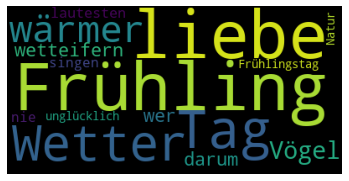

In [44]:
# import matplotlib.pyplot as plt # schon gemacht
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Jetzt sind Sie an der Reihe. Versuchen Sie, für jedes der Dokumente im Gutenberg-Korpus des NLTK eine Wortwolke zu erstellen. Ich empfehle, dies in einer for-Schleife zu tun, und ich habe sie für Sie gestartet.

Werfen Sie einen Blick auf die Ausgaben. Die größten Wörter sind die häufigsten im Dokument (deshalb ignorieren wir Stoppwörter; wenn wir das nicht täten, würden sie das ganze Bild ausfüllen!). Schauen Sie sich die Ergebnisse an: überraschen sie Sie?

Wenn Sie sich sehr kreativ fühlen, können Sie auch verschiedene Parameter ändern, z. B. die Anzahl der Wörter, die Hintergrundfarben, die Textfarben, Mindestwortlänge und so weiter. Das alles ist in der Dokumentation erklärt, hier: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

Die Lösung finden Sie am Ende dieses Notebook.

   ### 'Noun Chunking': identifizieren von Noun Chunks

#### Detusch

In [45]:
# Erinnerung: wir haben bereits einen Text 'biographie' erstellt
biographie

'Julia Gillard ist eine australische Politikerin und Australiens einzige weibliche Premierministerin, von 2010 bis 2013 im Dienst. Sie wuchs in Adelaide auf und besuchte die University of Melbourne, die sie mit einem Bachelor of Laws abschloss. Während dieser Zeit war sie Präsidentin der Australian Union of Students. Gillard arbeitete zunächst als Partnerin bei der Anwaltskanzlei Slater and Gordon und spezialisierte sich auf Arbeitsrecht. Später trat sie der Labor Party bei und wurde deren Vorsitzende.'

In [46]:
# HanoverTagger tag-sent erzeugt das Token, Lemma und Pos-Tag
biographie_tokens = nltk.word_tokenize(biographie, language='german')
biographie_tokens_lemmas_und_tags = tagger.tag_sent(biographie_tokens)
biographie_tokens_lemmas_und_tags

[('Julia', 'Julia', 'NE'),
 ('Gillard', 'Gillard', 'NE'),
 ('ist', 'sein', 'VAFIN'),
 ('eine', 'eine', 'ART'),
 ('australische', 'australisch', 'ADJA'),
 ('Politikerin', 'Politikerin', 'NN'),
 ('und', 'und', 'KON'),
 ('Australiens', 'Australien', 'NE'),
 ('einzige', 'einzig', 'ADJA'),
 ('weibliche', 'weiblich', 'ADJA'),
 ('Premierministerin', 'Premierministerin', 'NN'),
 (',', '--', '$,'),
 ('von', 'von', 'APPR'),
 ('2010', '2010', 'CARD'),
 ('bis', 'bis', 'KON'),
 ('2013', '2013', 'CARD'),
 ('im', 'im', 'APPRART'),
 ('Dienst', 'Dienst', 'NN'),
 ('.', '--', '$.'),
 ('Sie', 'sie', 'PPER'),
 ('wuchs', 'wachsen', 'VVFIN'),
 ('in', 'in', 'APPR'),
 ('Adelaide', 'Adelaid', 'NN'),
 ('auf', 'auf', 'PTKVZ'),
 ('und', 'und', 'KON'),
 ('besuchte', 'besuchen', 'VVFIN'),
 ('die', 'die', 'ART'),
 ('University', 'University', 'NE'),
 ('of', 'Of', 'NE'),
 ('Melbourne', 'Melbourne', 'NE'),
 (',', '--', '$,'),
 ('die', 'die', 'PRELS'),
 ('sie', 'sie', 'PPER'),
 ('mit', 'mit', 'APPR'),
 ('einem', 'einem'

In [47]:
# Lemmata ignorieren; wir brauchen nur Tokens und Pos Tags
biographie_tokens_und_tags = [(tok, pos) for (tok, lemm, pos) in biographie_tokens_lemmas_und_tags]

In [48]:
grammar = "NP: {<ART>?<ADJA>*<NN|NE>+}"
parser_deutsch = nltk.RegexpParser(grammar)
biographie_noun_chunks = parser_deutsch.parse(biographie_tokens_und_tags)

# Hinweis: Um die Ergebnisse dieser classifiers auch ohne die print-Anweisung anzeigen zu können, können Sie 
# optional ghostscript installieren. https://wiki.scribus.net/canvas/Installation_and_Configuration_of_Ghostscript
print(biographie_noun_chunks)

(S
  (NP Julia/NE Gillard/NE)
  ist/VAFIN
  (NP eine/ART australische/ADJA Politikerin/NN)
  und/KON
  (NP Australiens/NE)
  (NP einzige/ADJA weibliche/ADJA Premierministerin/NN)
  ,/$,
  von/APPR
  2010/CARD
  bis/KON
  2013/CARD
  im/APPRART
  (NP Dienst/NN)
  ./$.
  Sie/PPER
  wuchs/VVFIN
  in/APPR
  (NP Adelaide/NN)
  auf/PTKVZ
  und/KON
  besuchte/VVFIN
  (NP die/ART University/NE of/NE Melbourne/NE)
  ,/$,
  die/PRELS
  sie/PPER
  mit/APPR
  einem/ART
  Bachelor/FM
  of/FM
  Laws/FM
  abschloss/VVFIN
  ./$.
  Während/KOUS
  dieser/PDAT
  (NP Zeit/NN)
  war/VAFIN
  sie/PPER
  (NP Präsidentin/NN)
  (NP der/ART Australian/NE Union/NN)
  of/FM
  (NP Students/NN)
  ./$.
  (NP Gillard/NE)
  arbeitete/VVFIN
  zunächst/ADV
  als/APPR
  (NP Partnerin/NN)
  bei/APPR
  (NP der/ART Anwaltskanzlei/NN Slater/NE and/NE Gordon/NE)
  und/KON
  spezialisierte/VVFIN
  sich/PRF
  auf/APPR
  (NP Arbeitsrecht/NN)
  ./$.
  Später/ADJD
  trat/VVFIN
  sie/PPER
  (NP der/ART Labor/NN Party/NE)
  bei/PTKVZ

In [49]:
type(biographie_noun_chunks), type(biographie_noun_chunks[0]), type(biographie_noun_chunks[1])

(nltk.tree.tree.Tree, nltk.tree.tree.Tree, tuple)

In [50]:
for i in biographie_noun_chunks:
    if type(i) == nltk.tree.Tree:
        print(i)

(NP Julia/NE Gillard/NE)
(NP eine/ART australische/ADJA Politikerin/NN)
(NP Australiens/NE)
(NP einzige/ADJA weibliche/ADJA Premierministerin/NN)
(NP Dienst/NN)
(NP Adelaide/NN)
(NP die/ART University/NE of/NE Melbourne/NE)
(NP Zeit/NN)
(NP Präsidentin/NN)
(NP der/ART Australian/NE Union/NN)
(NP Students/NN)
(NP Gillard/NE)
(NP Partnerin/NN)
(NP der/ART Anwaltskanzlei/NN Slater/NE and/NE Gordon/NE)
(NP Arbeitsrecht/NN)
(NP der/ART Labor/NN Party/NE)
(NP Vorsitzende/NN)


#### Englisch

In [51]:
biography = "Julia Gillard is an Australian politician and Australia's only female prime minister, serving from 2010 to 2013. She grew up in Adelaide and attended the University of Melbourne, graduating with a Bachelor of Laws degree. During that time, she was president of the Australian Union of Students. Gillard first worked as a partner at the law firm Slater and Gordon, specializing in labor law. She later joined the Labor Party and became its chairwoman."
biography_tokens = nltk.word_tokenize(biography, language='english')
biography_tokens_and_tags = nltk.pos_tag(biography_tokens)
biography_tokens_and_tags

[('Julia', 'NNP'),
 ('Gillard', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('Australian', 'JJ'),
 ('politician', 'NN'),
 ('and', 'CC'),
 ('Australia', 'NNP'),
 ("'s", 'POS'),
 ('only', 'JJ'),
 ('female', 'JJ'),
 ('prime', 'JJ'),
 ('minister', 'NN'),
 (',', ','),
 ('serving', 'VBG'),
 ('from', 'IN'),
 ('2010', 'CD'),
 ('to', 'TO'),
 ('2013', 'CD'),
 ('.', '.'),
 ('She', 'PRP'),
 ('grew', 'VBD'),
 ('up', 'RP'),
 ('in', 'IN'),
 ('Adelaide', 'NNP'),
 ('and', 'CC'),
 ('attended', 'VBD'),
 ('the', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Melbourne', 'NNP'),
 (',', ','),
 ('graduating', 'VBG'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('Bachelor', 'NNP'),
 ('of', 'IN'),
 ('Laws', 'NNP'),
 ('degree', 'NN'),
 ('.', '.'),
 ('During', 'IN'),
 ('that', 'DT'),
 ('time', 'NN'),
 (',', ','),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('president', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Australian', 'NNP'),
 ('Union', 'NNP'),
 ('of', 'IN'),
 ('Students', 'NNP'),
 ('.', '.'),
 ('Gillard', 'NNP'),
 ('first', 'RB'

In [52]:
grammar = "NP: {<DT>?<JJ>*<NN|NNP>+}"

parser_english = nltk.RegexpParser(grammar)
biography_noun_chunks = parser_english.parse(biography_tokens_and_tags)
print(biography_noun_chunks)

(S
  (NP Julia/NNP Gillard/NNP)
  is/VBZ
  (NP an/DT Australian/JJ politician/NN)
  and/CC
  (NP Australia/NNP)
  's/POS
  (NP only/JJ female/JJ prime/JJ minister/NN)
  ,/,
  serving/VBG
  from/IN
  2010/CD
  to/TO
  2013/CD
  ./.
  She/PRP
  grew/VBD
  up/RP
  in/IN
  (NP Adelaide/NNP)
  and/CC
  attended/VBD
  (NP the/DT University/NNP)
  of/IN
  (NP Melbourne/NNP)
  ,/,
  graduating/VBG
  with/IN
  (NP a/DT Bachelor/NNP)
  of/IN
  (NP Laws/NNP degree/NN)
  ./.
  During/IN
  (NP that/DT time/NN)
  ,/,
  she/PRP
  was/VBD
  (NP president/NN)
  of/IN
  (NP the/DT Australian/NNP Union/NNP)
  of/IN
  (NP Students/NNP)
  ./.
  (NP Gillard/NNP)
  first/RB
  worked/VBD
  as/IN
  (NP a/DT partner/NN)
  at/IN
  (NP the/DT law/NN firm/NN Slater/NNP)
  and/CC
  (NP Gordon/NNP)
  ,/,
  specializing/VBG
  in/IN
  (NP labor/NN law/NN)
  ./.
  She/PRP
  later/RB
  joined/VBD
  (NP the/DT Labor/NNP Party/NNP)
  and/CC
  became/VBD
  its/PRP$
  (NP chairwoman/NN)
  ./.)


### Parsing mit einer selbst definitieren Grammatik

In [53]:
# Verbesserungen: die folgender Grammars nacheinander ausprobieren für Englisch und die Ausgaben vergleichen
grammar = r"""
    POSS: {<NN|NNP><POS>}
    NP: {<POSS|DT>?<JJ>*<NN|NNP>*}
  """
grammar = r"""
    POSS: {<NN|NNP><POS>}
    PP:{<IN><NN|NNP>}
    NP: {<POSS|DT>?<JJ>*<NN|NNP>+<PP>*}
  """
grammar = r"""
    POSS: {<NN|NNP><POS>}
    PP:{<IN><NN|NNP>}
    NP: {<POSS|DT>?<JJ>*<NN|NNP>+<PP>*}
    CC-NP: {<NP>(<CC><NP>)+}
  """

In [54]:
parser_english = nltk.RegexpParser(grammar)
biography_noun_chunks = parser_english.parse(biography_tokens_and_tags)
print(biography_noun_chunks)

(S
  (NP Julia/NNP Gillard/NNP)
  is/VBZ
  (CC-NP
    (NP an/DT Australian/JJ politician/NN)
    and/CC
    (NP
      (POSS Australia/NNP 's/POS)
      only/JJ
      female/JJ
      prime/JJ
      minister/NN))
  ,/,
  serving/VBG
  from/IN
  2010/CD
  to/TO
  2013/CD
  ./.
  She/PRP
  grew/VBD
  up/RP
  (PP in/IN Adelaide/NNP)
  and/CC
  attended/VBD
  (NP the/DT University/NNP (PP of/IN Melbourne/NNP))
  ,/,
  graduating/VBG
  with/IN
  (NP a/DT Bachelor/NNP (PP of/IN Laws/NNP))
  (NP degree/NN)
  ./.
  During/IN
  (NP that/DT time/NN)
  ,/,
  she/PRP
  was/VBD
  (NP president/NN)
  of/IN
  (NP the/DT Australian/NNP Union/NNP (PP of/IN Students/NNP))
  ./.
  (NP Gillard/NNP)
  first/RB
  worked/VBD
  as/IN
  (NP a/DT partner/NN)
  at/IN
  (CC-NP
    (NP the/DT law/NN firm/NN Slater/NNP)
    and/CC
    (NP Gordon/NNP))
  ,/,
  specializing/VBG
  (PP in/IN labor/NN)
  (NP law/NN)
  ./.
  She/PRP
  later/RB
  joined/VBD
  (NP the/DT Labor/NNP Party/NNP)
  and/CC
  became/VBD
  its/PRP$


In [55]:
for i in biography_noun_chunks:
    if type(i) == nltk.tree.Tree:
        if i.label() in ['NP', 'CC-NP']:
            print(i)

(NP Julia/NNP Gillard/NNP)
(CC-NP
  (NP an/DT Australian/JJ politician/NN)
  and/CC
  (NP
    (POSS Australia/NNP 's/POS)
    only/JJ
    female/JJ
    prime/JJ
    minister/NN))
(NP the/DT University/NNP (PP of/IN Melbourne/NNP))
(NP a/DT Bachelor/NNP (PP of/IN Laws/NNP))
(NP degree/NN)
(NP that/DT time/NN)
(NP president/NN)
(NP the/DT Australian/NNP Union/NNP (PP of/IN Students/NNP))
(NP Gillard/NNP)
(NP a/DT partner/NN)
(CC-NP (NP the/DT law/NN firm/NN Slater/NNP) and/CC (NP Gordon/NNP))
(NP law/NN)
(NP the/DT Labor/NNP Party/NNP)
(NP chairwoman/NN)


### Quick Projekt: Ihre eigene Grammatik mit regulären Ausdrücken bauen

Unsere deutsche Grammatik hat ganz gut funktioniert, aber die folgenden Noun Phrases fehlen:

- Australiens einzige weibliche Premierministerin
- Einem Bachelor of Laws
- Dieser Zeit
- Der Australian Union of Students
- Deren Vorsitzende

Um das Erstellen von Grammatiken mit regulären Ausdrücken zu üben, versuchen Sie, eine anspruchsvollere Grammatik zu rekonstruieren, wie wir für Englisch gemacht haben. Sie können Ihre Grammatik auch an Ihren eigenen Sätzen ausprobieren.

Theoretisch konnen sie sollten ´Regeln erstellen, ohne die Bedeutung der POS-Tags zu kennen. Als leidenschaftlicher Linguist empfehle ich Ihnen jedoch, einen Blick auf das Tag-Schema zu werfen, das beim Training des HanoverTaggers verwendet wurde: https://www.ims.uni-stuttgart.de/documents/ressourcen/korpora/tiger-corpus/annotation/tiger_scheme-morph.pdf

Zur Erinnerung: Sie können auf die nltk-Tags und ihre Bedeutungen über ```nltk.help.upenn_tagset(tagpattern=None)``` zugreifen

Übrigens: Seien Sie nicht frustriert, wenn Ihre Grammatik nicht perfekt funktioniert. Und schummeln Sie nicht und suchen Sie am Ende dieses Heftes nach einer Lösung! Ich habe keine geschrieben, denn eine perfekte Grammatik zu schreiben ist eine fast unmögliche Aufgabe, wegen der Ausnahmen, die in der Sprache immer auftauchen. Wenn Sie mir nicht glauben, gehen Sie zurück zur Stemming-Sektion und überprüfen Sie die Ausgabe: An diesen Werkzeugen haben Linguisten jahrelang gearbeitet, und trotzdem sind sie nicht perfekt! Wichtiger ist, dass Sie mit den Tags und regulären Ausdrücken spielen, um ein Gefühl dafür zu bekommen, wie sie funktionieren.

### Named Entity Recognition

In [56]:
# Wir haben zuvor Token und Pos-Tags aus dem HanoverTagger übernommen.
# Wir müssen das POS-Tagging erneut mit NLTK durchführen, sodass das Tagset mit dem NLTK NE chunker übereinstimmt
biographie_tokens_und_tags_nltk = nltk.pos_tag(biographie_tokens)

In [60]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
biographie_binary_entities = nltk.ne_chunk(biographie_tokens_und_tags_nltk,
                                           binary=True)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [61]:
for i in biographie_binary_entities:
    if type(i) == nltk.tree.Tree:
        print(i)

(NE Julia/NNP Gillard/NNP)
(NE Australiens/NNP)
(NE Adelaide/NNP)
(NE University/NNP)
(NE Melbourne/NNP)
(NE Bachelor/NNP)
(NE Laws/NNP)
(NE Australian/NNP Union/NNP)
(NE Students/NNP)
(NE Gillard/NNP)
(NE Partnerin/NNP)
(NE Anwaltskanzlei/NNP Slater/NNP)
(NE Gordon/NNP)
(NE Labor/NNP Party/NNP)


In [62]:
# Hinweis: Um die Ergebnisse dieser classifiers auch ohne die print-Anweisung anzeigen zu können, können Sie 
# optional ghostscript installieren. https://wiki.scribus.net/canvas/Installation_and_Configuration_of_Ghostscript

In [63]:
biographie_labelled_entities = nltk.ne_chunk(biographie_tokens_und_tags_nltk,
                                             binary=False)
for i in biographie_labelled_entities:
    if type(i) == nltk.tree.Tree:
        print(i)

(PERSON Julia/NNP)
(PERSON Gillard/NNP)
(GPE Australiens/NNP)
(PERSON Dienst/NNP)
(GPE Adelaide/NNP)
(ORGANIZATION University/NNP)
(GPE Melbourne/NNP)
(ORGANIZATION Bachelor/NNP)
(GPE Laws/NNP)
(PERSON Während/NNP)
(PERSON Australian/NNP Union/NNP)
(GPE Students/NNP)
(PERSON Gillard/NNP)
(PERSON Partnerin/NNP)
(PERSON Anwaltskanzlei/NNP Slater/NNP)
(PERSON Gordon/NNP)
(PERSON Später/NNP)
(ORGANIZATION Labor/NNP Party/NNP)


In [64]:
# Jetzt auf Englisch
biography_binary_entities = nltk.ne_chunk(biography_tokens_and_tags, binary=True)
for i in biography_binary_entities:
    if type(i) == nltk.tree.Tree:
        print(i)

(NE Julia/NNP Gillard/NNP)
(NE Australian/JJ)
(NE Australia/NNP)
(NE Adelaide/NNP)
(NE University/NNP)
(NE Melbourne/NNP)
(NE Laws/NNP)
(NE Australian/NNP Union/NNP)
(NE Students/NNP)
(NE Gillard/NNP)
(NE Gordon/NNP)
(NE Labor/NNP Party/NNP)


In [65]:
biography_labelled_entities = nltk.ne_chunk(biography_tokens_and_tags, binary=False)
for i in biography_labelled_entities:
    if type(i) == nltk.tree.Tree:
        print(i)

(PERSON Julia/NNP)
(PERSON Gillard/NNP)
(GPE Australian/JJ)
(GPE Australia/NNP)
(GPE Adelaide/NNP)
(ORGANIZATION University/NNP)
(GPE Melbourne/NNP)
(GPE Laws/NNP)
(GPE Australian/NNP Union/NNP)
(GPE Students/NNP)
(PERSON Gillard/NNP)
(PERSON Slater/NNP)
(PERSON Gordon/NNP)
(ORGANIZATION Labor/NNP Party/NNP)


### Anzeigen der verarbeiteten Daten

In [66]:
biographie_stems = [snowball.stem(token) for token in biographie_tokens]
biographie_lemmas = [lemma for token, lemma, pos_tag in biographie_tokens_lemmas_und_tags]
biographie_pos_tags = [pos_tag for token, lemma, pos_tag in biographie_tokens_lemmas_und_tags]
is_stop = [l in stopwords_de for l in biographie_lemmas]
is_punct = [t in string.punctuation for t in biographie_tokens]

In [67]:
# Da Mehrwort-Entitäten gruppiert sind, müssen wir sie herauslösen, um sie mit den anderen Anmerkungen abgleichen zu können
biographie_binary_labels = []
for item in biographie_binary_entities:
    if type(item) == nltk.tree.Tree:
        for i in range(len(item)):
            biographie_binary_labels.append(item.label())
    else:
        biographie_binary_labels.append(None)

biographie_entity_labels = []
for item in biographie_labelled_entities:
    if type(item) == nltk.tree.Tree:
        for i in range(len(item)):
            biographie_entity_labels.append(item.label())
    else:
        biographie_entity_labels.append(None)

In [68]:
processed_df = pd.DataFrame({"Token": biographie_tokens,
                             "Stem": biographie_stems,
                             "Lemma": biographie_lemmas,
                             "Lemma is Stopword": is_stop,
                             "Token is Punctuation": is_punct,
                             "POS Tag ": biographie_pos_tags,
                             "Entity Tag": biographie_binary_labels,
                             "Labelled Entity Tag": biographie_entity_labels
                     })
display(processed_df.head(50))

,Token,Stem,Lemma,Lemma is Stopword,Token is Punctuation,POS Tag,Entity Tag,Labelled Entity Tag
0,Julia,julia,Julia,False,False,NE,NE,PERSON
1,Gillard,gillard,Gillard,False,False,NE,NE,PERSON
2,ist,ist,sein,True,False,VAFIN,None,None
3,eine,ein,eine,True,False,ART,None,None
4,australische,australisch,australisch,False,False,ADJA,None,None
5,Politikerin,politikerin,Politikerin,False,False,NN,None,None
6,und,und,und,True,False,KON,None,None
7,Australiens,australien,Australien,False,False,NE,NE,GPE
8,einzige,einzig,einzig,False,False,ADJA,None,None
9,weibliche,weiblich,weiblich,False,False,ADJA,None,None


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Document: austen-emma.txt


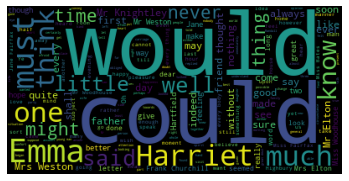

Document: austen-persuasion.txt


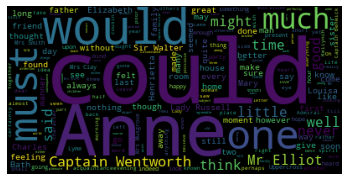

Document: austen-sense.txt


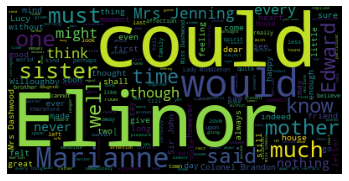

Document: bible-kjv.txt


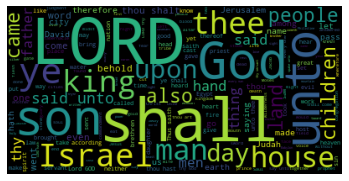

Document: blake-poems.txt


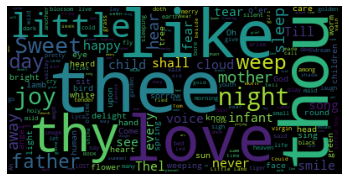

Document: bryant-stories.txt


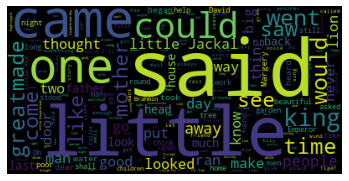

Document: burgess-busterbrown.txt


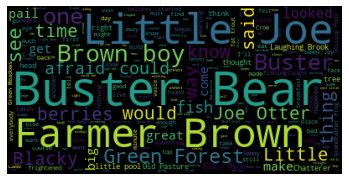

Document: carroll-alice.txt


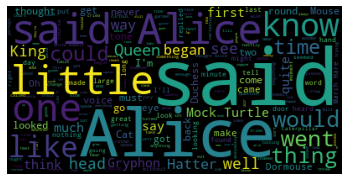

Document: chesterton-ball.txt


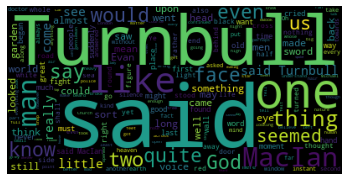

Document: chesterton-brown.txt


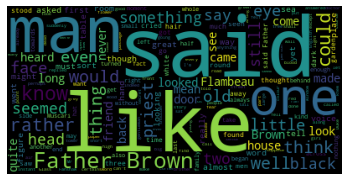

Document: chesterton-thursday.txt


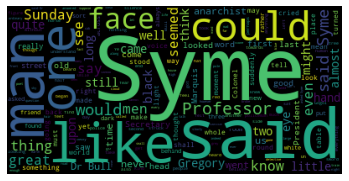

Document: edgeworth-parents.txt


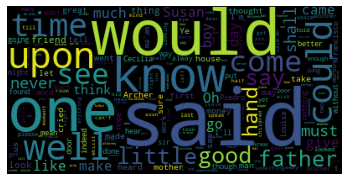

Document: melville-moby_dick.txt


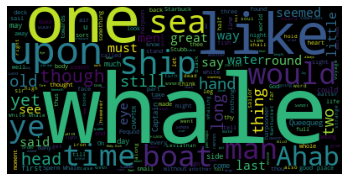

Document: milton-paradise.txt


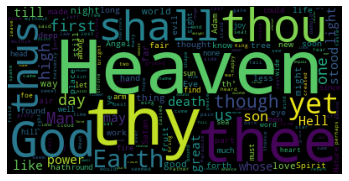

Document: shakespeare-caesar.txt


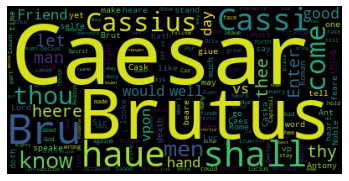

Document: shakespeare-hamlet.txt


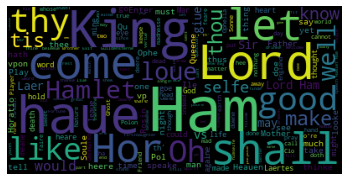

Document: shakespeare-macbeth.txt


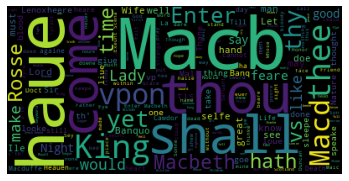

Document: whitman-leaves.txt


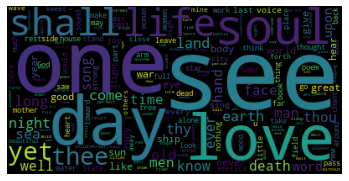

In [70]:
#### Quick-Projekt Lösung:
nltk.download('gutenberg')
from nltk.corpus import gutenberg
stopwords_en = set(stopwords.words('english'))

for f in gutenberg.fileids():
    print(f"Document: {f}")
    text = gutenberg.raw(f)
    tokens = nltk.word_tokenize(text, language='english')
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    lemmas_no_stopwords = [l for l in lemmas if l not in stopwords_en]
    vocab = set(lemmas_no_stopwords)
    wordcloud = WordCloud(stopwords=stopwords_en).generate(text)
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()